In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart_cleveland_upload.csv')

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [9]:
df.duplicated().sum()

0

In [11]:
df.describe(percentiles=[0.80, 0.90, 0.95, 0.99])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
80%,62.800000,1.000000,3.000000,145.000000,287.600000,0.000000,2.000000,170.000000,1.000000,1.900000,1.000000,1.000000,2.000000,1.000000
90%,66.000000,1.000000,3.000000,152.800000,309.000000,1.000000,2.000000,177.400000,1.000000,2.800000,1.000000,2.000000,2.000000,1.000000
95%,68.000000,1.000000,3.000000,160.800000,327.600000,1.000000,2.000000,182.000000,1.000000,3.400000,2.000000,3.000000,2.000000,1.000000
99%,71.120000,1.000000,3.000000,180.000000,407.080000,1.000000,2.000000,192.080000,1.000000,4.208000,2.000000,3.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [14]:
df.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

In [15]:
print("\nCounts for each class in 'condition':")
print("Class 0:", (df['condition'] == 0).sum())
print("Class 1:", (df['condition'] == 1).sum()) # 


Counts for each class in 'condition':
Class 0: 160
Class 1: 137


In [16]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(columns='condition')
y = df['condition']

ros = RandomOverSampler(sampling_strategy='minority', random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)
print("\nShape of resampled data:", X_resampled.shape, y_resampled.shape)


Shape of resampled data: (320, 13) (320,)


In [23]:
y_resampled.value_counts()

condition
0    160
1    160
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
columns_to_encode = ['cp', 'restecg', 'slope', 'ca', 'thal']

encoded_cols = ohe.fit_transform(X_resampled[columns_to_encode])
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out())

X_encoded = pd.concat([X_resampled, encoded_df], axis=1)
X_encoded = X_encoded.drop(columns=columns_to_encode)
X_encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,69,1,160,234,1,131,0,0.1,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,69,0,140,239,0,151,0,1.8,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,66,0,150,226,0,114,0,2.6,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,65,1,138,282,1,174,0,1.4,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,64,1,110,211,0,144,1,1.8,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,62,0,160,164,0,145,0,6.2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
316,61,1,134,234,0,145,0,2.6,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
317,43,1,120,177,0,120,1,2.5,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
318,62,0,150,244,0,154,1,1.4,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_resampled, test_size=0.3, 
                                                    stratify=y_resampled, random_state=2)
print("\nShapes of training and test sets:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Shapes of training and test sets: (224, 25) (96, 25) (224,) (96,)


In [26]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

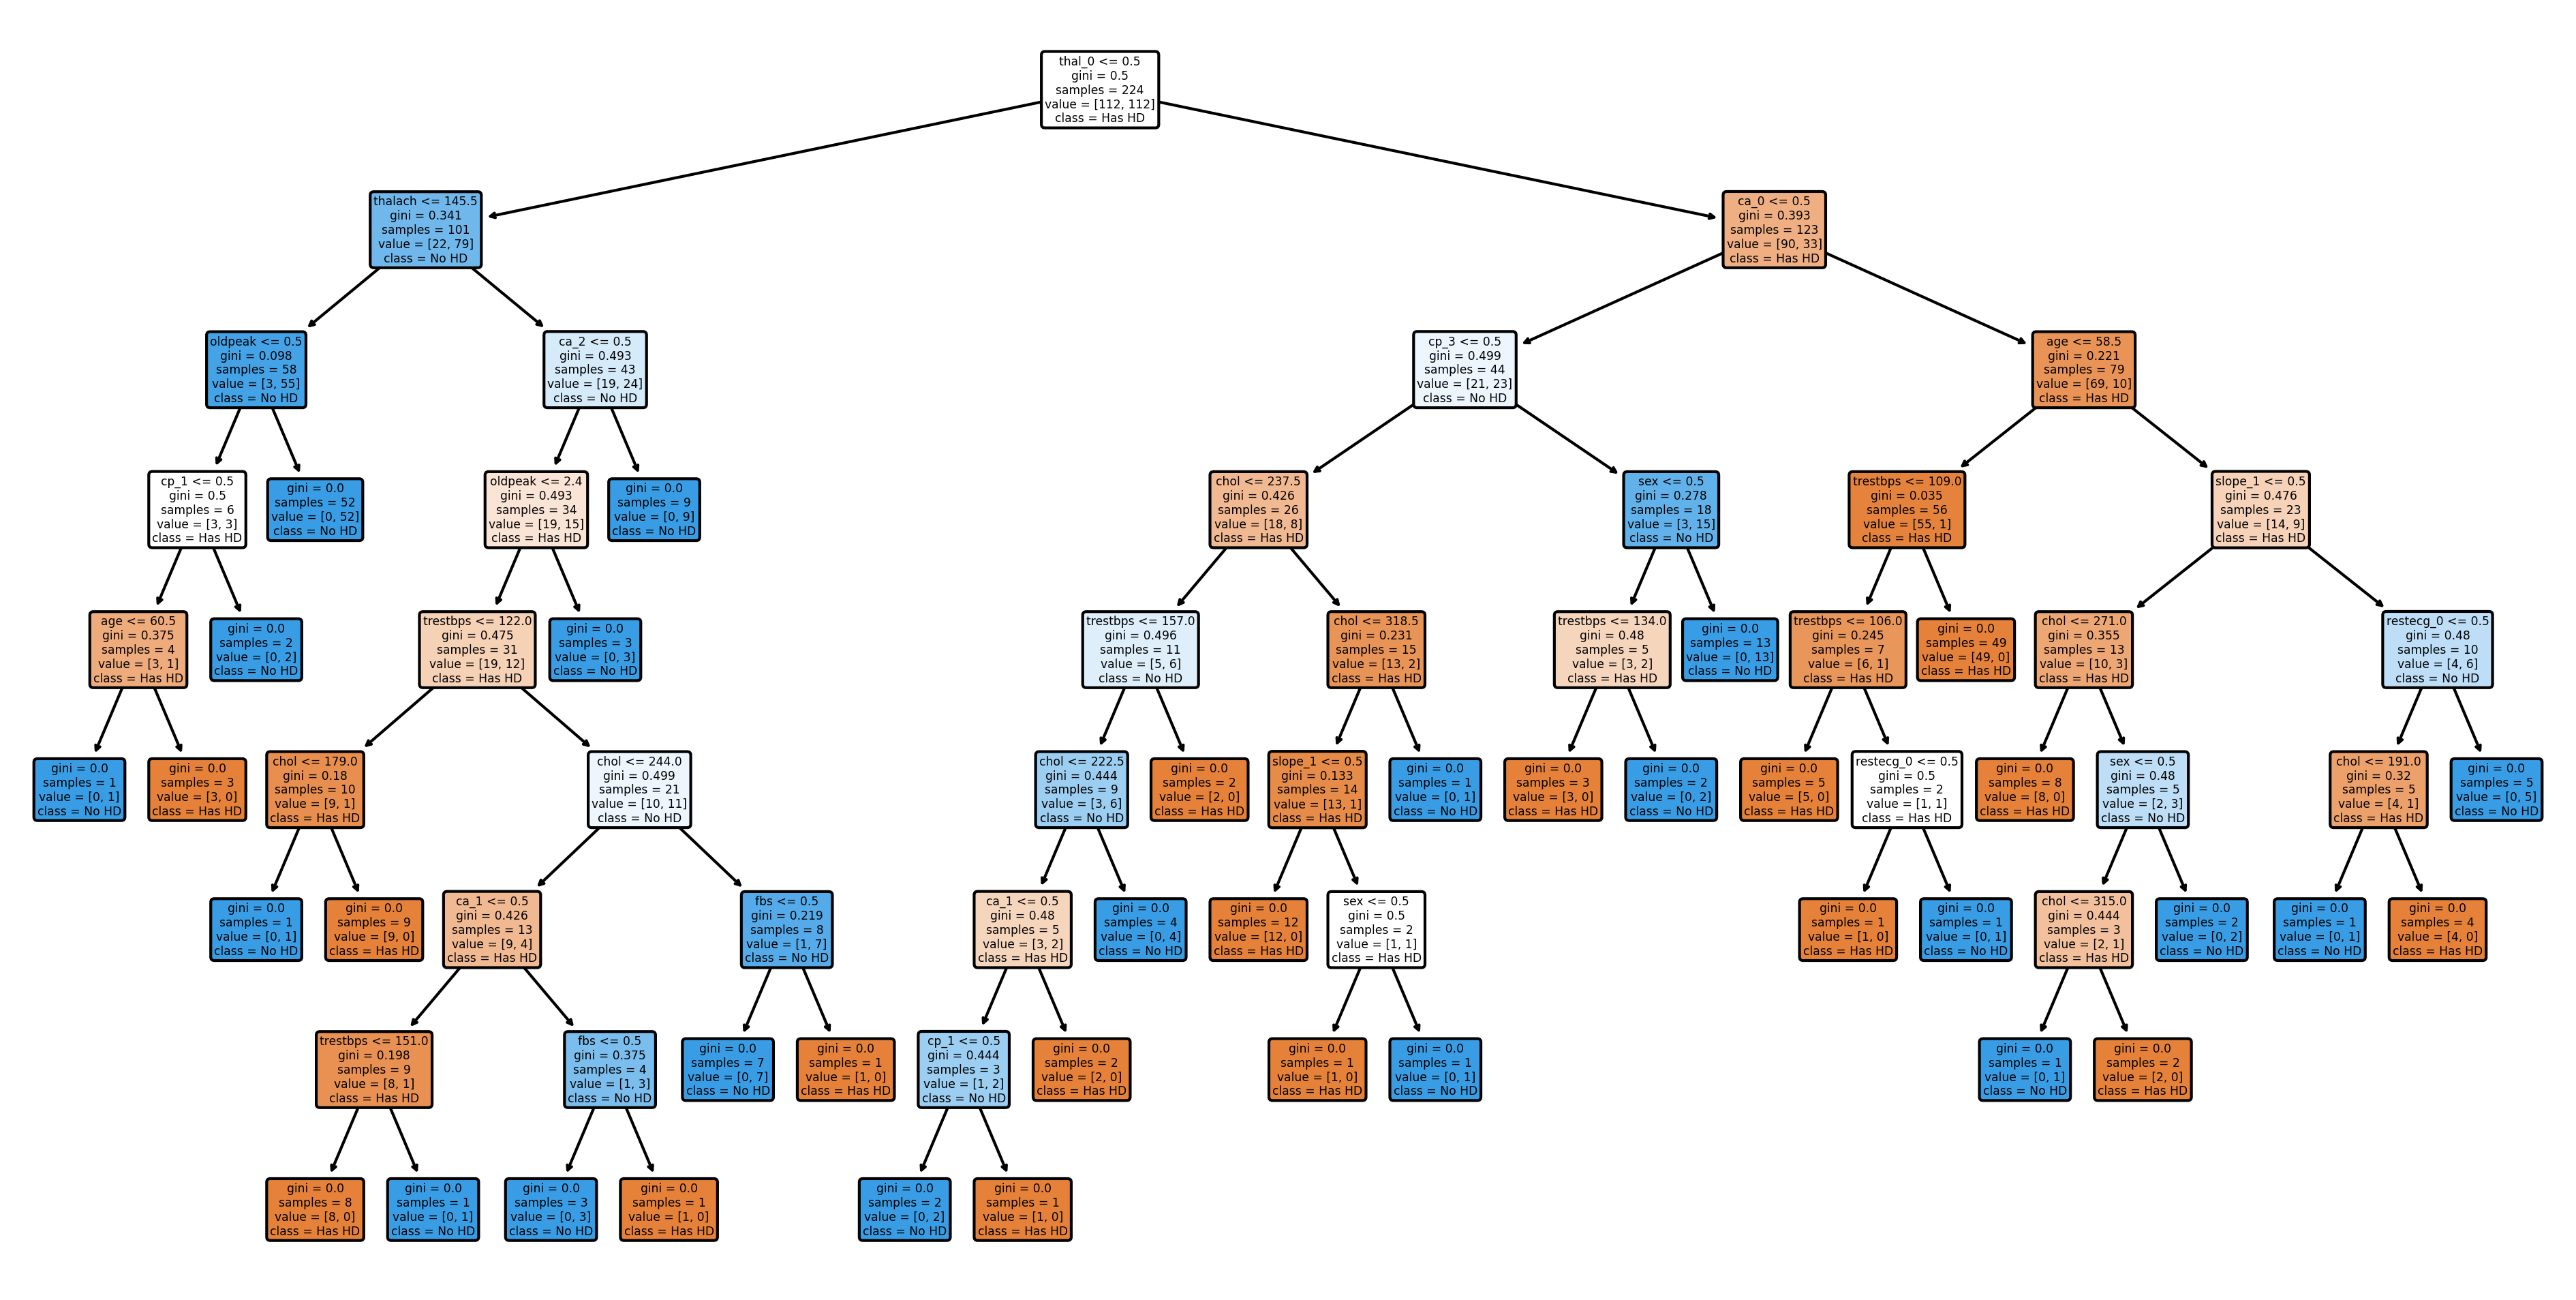

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,8), dpi=300)
plot_tree(dtc, filled=True, rounded=True, class_names=['Has HD', 'No HD'], feature_names = X_train.columns)
plt.show()

In [28]:
print("\nModel performance on training set:", dtc.score(X_train, y_train))
print("Model performance on test set:", dtc.score(X_test, y_test))


Model performance on training set: 1.0
Model performance on test set: 0.8020833333333334


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [31]:
y_pred = gbc.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Mean Squared Error: 0.14583333333333334
Accuracy: 0.8541666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        48
           1       0.85      0.85      0.85        48

    accuracy                           0.85        96
   macro avg       0.85      0.85      0.85        96
weighted avg       0.85      0.85      0.85        96


Confusion Matrix:
 [[41  7]
 [ 7 41]]


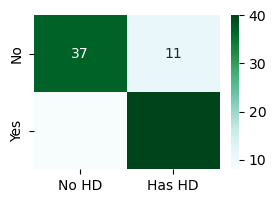

In [33]:
Xtest_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test, Xtest_pred)
res = pd.DataFrame(cm, columns=['No HD', 'Has HD'], index=['No', 'Yes'])

plt.figure(figsize=(3,2))
sns.heatmap(res, annot=True, cmap='BuGn')
plt.show()